In [44]:
!pip install astroquery

#Uses astroquery to plot all GAIA events from Vizier within a radius. Please feel free to modify the code if you find imporvements.

from astroquery.vizier import Vizier
from astropy.coordinates import Angle

#adjust Angle(2,arcmin) to desired radius

Vizier.ROW_LIMIT = -1
v = Vizier.query_object("NGC6540", radius=Angle(20,'arcmin'),catalog='gaia')

print(v)

TableList with 18 tables:
	'0:I/324/igsl3' with 18 column(s) and 1110071 row(s) 
	'1:I/337/gaia' with 14 column(s) and 124636 row(s) 
	'2:I/337/tgas' with 20 column(s) and 61 row(s) 
	'3:I/337/tgasptyc' with 22 column(s) and 61 row(s) 
	'4:I/345/gaia2' with 32 column(s) and 313823 row(s) 
	'5:I/345/rrlyrae' with 23 column(s) and 14 row(s) 
	'6:I/345/lpv' with 13 column(s) and 31 row(s) 
	'7:I/345/varres' with 9 column(s) and 131 row(s) 
	'8:I/345/ssoobs' with 7 column(s) and 18 row(s) 
	'9:I/347/gaia2dis' with 9 column(s) and 192097 row(s) 
	'10:I/350/gaiaedr3' with 39 column(s) and 388562 row(s) 
	'11:I/350/tyc2tdsc' with 16 column(s) and 98 row(s) 
	'12:I/350/comscanl' with 13 column(s) and 35 row(s) 
	'13:I/352/gedr3dis' with 10 column(s) and 228167 row(s) 
	'14:VI/137/gum_mw' with 17 column(s) and 1071235 row(s) 
	'15:VI/137/gum_gal' with 11 column(s) and 20 row(s) 
	'16:VI/137/gum_sn' with 9 column(s) and 1 row(s) 
	'17:VI/145/attitude' with 18 column(s) and 33 row(s) 


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits import mplot3d
from scipy.stats import kde

coords = pd.DataFrame(columns=['RAJ2000','DEJ2000','Plx','pmRA','pmDE','Gmag'])
for table_name in v.keys():
  table = v[table_name]
  df = table.to_pandas()
  if 'Plx' in df.columns and 'Gmag' in df.columns:
    if 'RAJ2000' in df.columns:
      coords = pd.concat([coords,df[['RAJ2000','DEJ2000','Plx','pmRA','pmDE','Gmag']]])
    elif 'RA_ICRS' in df.columns:
      df = df.rename(columns={'RA_ICRS':'RAJ2000','DE_ICRS':'DEJ2000'})
      coords = pd.concat([coords,df[['RAJ2000','DEJ2000','Plx','pmRA','pmDE','Gmag']]])
    elif '_RA.icrs' in df.columns:
      df = df.rename(columns={'_RA.icrs':'RAJ2000','_DE.icrs':'DEJ2000'})
      coords = pd.concat([coords,df[['RAJ2000','DEJ2000','Plx','pmRA','pmDE','Gmag']]])

coords['RAJ2000'] = coords['RAJ2000']-360
coords2 = coords.copy()
#coords2.dropna(subset=["Plx"], inplace=True)
#indexNames = coords2[ coords2['Plx'] < 0 ].index
#coords2.drop(indexNames , inplace=True)
coords2['Distance'] = 1/(coords2['Plx']/1000)

coords = coords.dropna()
print(coords.shape)
#plt.scatter(x=frontplane['RAJ2000'], y=frontplane['DEJ2000'], color='b', s=10)

#ax.scatter(coords['RAJ2000'], coords['DEJ2000'], s=1, color='red')
#plt.show()
#fig = plt.figure(figsize=(20,20))
#ax = plt.axes(projection='3d')
#ax.scatter3D(coords2['RAJ2000'], coords2['DEJ2000'], coords2['Distance'])

/Users/kalgi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'HIP' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/kalgi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'PS1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/kalgi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'SDSSDR13' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/kalgi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'SkyMapper2' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/kalgi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'URAT1' from integer to floa

(419819, 6)


In [37]:
points = []
x_center,y_center = -88.4641667, -27.7653
r_1=0.07916666667**2#4.75 arcmin
r_2=0.1119585737**2 #4.75 root 2
r_3=0.1371206889**2 #4.75 root 3
r_4=0.1583333333**2 #9.5
r_5= 0.16625**2#honestly no clue
r_6=0.193917938**2 #^^^^
r_7=0.2094553121**2 #^^^^
r_8=0.2239171474**2 #9.5 root 2
r_9=0.2742413779**2 #9.5 root 3
r_10=0.3166666667**2 #19 

r5_1=(0.07916666667*1.05)**2#4.75 arcmin
r5_2=(0.1119585737*1.05)**2 #4.75 root 2
r5_3=(0.1371206889*1.05)**2 #4.75 root 3
r5_4=(0.1583333333*1.05)**2 #9.5
r5_5= (0.16625*1.05)**2#honestly no clue
r5_6=(0.193917938*1.05)**2 #^^^^
r5_7=(0.2094553121*1.05)**2 #^^^^
r5_8=(0.2239171474*1.05)**2 #9.5 root 2
r5_9=(0.2742413779*1.05)**2 #9.5 root 3
r5_10=(0.3166666667*1.05)**2 #19 

r10_1=(0.07916666667*1.1)**2#4.75 arcmin
r10_2=(0.1119585737*1.1)**2 #4.75 root 2
r10_3=(0.1371206889*1.1)**2 #4.75 root 3
r10_4=(0.1583333333*1.1)**2 #9.5
r10_5= (0.16625*1.1)**2#honestly no clue
r10_6=(0.193917938*1.1)**2 #^^^^
r10_7=(0.2094553121*1.1)**2 #^^^^
r10_8=(0.2239171474*1.1)**2 #9.5 root 2
r10_9=(0.2742413779*1.1)**2 #9.5 root 3
r10_10=(0.3166666667*1.1)**2 #19 

In [38]:
import statistics 
import math
radii = [0,r10_1,r10_2,r10_3,r10_4,r10_5,r10_6,r10_7, r10_8, r10_9, r10_10]
Plx = []
Gmag = []
pmRA = []
pmDE = []
for radius in range(1,len(radii)):
    temp_Plx = []
    temp_Gmag = []
    temp_pmRA = []
    temp_pmDE = []
    for i,x,y,z,l,f,g in zip(range(len(coords.RAJ2000)), coords.RAJ2000, coords.DEJ2000, coords.Gmag, coords.pmRA, coords.pmDE, coords.Plx):
        if ((x-x_center)**2 + (y-y_center)**2 < radii[radius]) and ((x-x_center)**2 + (y-y_center)**2 > radii[radius-1]):
            temp_Plx.append(g)
            temp_Gmag.append(z)
            temp_pmRA.append(l)
            temp_pmDE.append(f)
    Plx.append(temp_Plx)
    Gmag.append(temp_Gmag)
    pmRA.append(temp_pmRA)
    pmDE.append(temp_pmDE)

print('these are the number of points in each annuli')
for u in Plx:
    print(len(u))

print("mean for plx")
for a in Plx:
    print(statistics.mean(a))
print("stdev for plx")
for b in Plx:
    print(statistics.stdev(b))
print("These are the median Plx values of the radii:")
for m in Plx:
    print(statistics.median(m))
print('The range of Plx values per radii are:')
for q in Plx:
    print(max(q)-min(q))
print('The min vals of Plx  per radii are:')
for q in Plx:
    print(min(q))
print('The max vals of Plx  per radii are:')
for q in Plx:
    print(max(q))

these are the number of points in each annuli
26075
25709
26304
26162
10705
40482
24510
25128
101249
90324
mean for plx
0.2523903624161074
0.17920056011513477
0.15306131006690998
0.1860817330479321
0.14303481550677255
0.16696446074798676
0.1837997144022848
0.17119588904807387
0.17616319173522701
0.17654121606660467
stdev for plx
6.030189415101892
1.4504387585435505
3.323346937381144
2.227298614564901
3.532212115629459
2.119975834900654
2.5014520355295313
1.0601698990745316
2.0718712123896914
2.207551713403101
These are the median Plx values of the radii:
0.1489
0.15
0.14445
0.14934999999999998
0.1427
0.1479
0.1462
0.1472
0.149
0.1531
The range of Plx values per radii are:
793.115
184.11309999999997
531.8951
334.60429999999997
416.02259999999995
515.3465
323.6042
42.0914
495.48019999999997
710.2405
The min vals of Plx  per radii are:
-25.2034
-118.8941
-508.4987
-18.7387
-337.1713
-304.1442
-18.6098
-19.7393
-141.5225
-277.3855
The max vals of Plx  per radii are:
767.9116
65.219
23.3964

In [39]:
print("mean for gmag")
for c in Gmag:
    print(statistics.mean(c))
print("stdev for gmag")
for d in Gmag:
    print(statistics.stdev(d))
print("These are the median Gmag values of the radii")
for n in Gmag:
    print(statistics.median(n))
print('The range of Gmag vals per radii are:')
for r in Gmag:
    print(max(r)-min(r))
print('The min vals of Gmag  per radii are:')
for r in Gmag:
    print(min(r))
print('The max vals of Gmag  per radii are:')
for r in Gmag:
    print(max(r))

mean for gmag
17.49292241307766
17.54811547765374
17.591511639256385
17.615309166883264
17.60365706959365
17.615341567215058
17.624443156711546
17.63310744185769
17.661291072287135
17.703224934181392
stdev for gmag
1.2674747999675
1.2670738999679805
1.244867550753171
1.260226779259663
1.2519725964555073
1.2596342713416835
1.2614046575235187
1.2593942371693985
1.2571845116163145
1.2705170101544039
These are the median Gmag values of the radii
17.839653
17.8839
17.915909499999998
17.950658
17.9288
17.9581
17.939746
17.940987
17.9752
18.0096955
The range of Gmag vals per radii are:
11.318425
10.990708999999999
9.395622000000001
9.072415999999999
9.515183000000002
12.871737
11.066799999999999
11.363382000000001
12.855604999999999
10.987900000000002
The min vals of Gmag  per radii are:
8.3604
8.8457
10.359
10.6227
10.049617
6.9465
8.6986
8.442
7.1533
9.0327
The max vals of Gmag  per radii are:
19.678825
19.836409
19.754622
19.695116
19.5648
19.818237
19.7654
19.805382
20.008905
20.0206


In [40]:
print("mean for pmRA")
for e in pmRA:
    print(statistics.mean(e))
print("stdev for pmRA")
for h in pmRA:
    print(statistics.stdev(h))

print("These are the median pmRA values of the radii")
for o in pmRA:
    print(statistics.median(o))
print('The range of pmRA vals per radii are:')
for s in pmRA:
    print(max(s)-min(s))
print('The min vals of Gmag  per radii are:')
for s in pmRA:
    print(min(s))
print('The max vals of Gmag  per radii are:')
for s in pmRA:
    print(max(s))

mean for pmRA
-2.1044683029721956
-2.217918044264654
-2.199647924270073
-2.1837794893356777
-2.329214292386735
-2.21681490539005
-2.1563770297837617
-2.200689270932824
-2.162260061827771
-2.184339433594615
stdev for pmRA
11.795309068287954
4.6805252684126755
3.531325397637737
5.684452348777205
9.533896456553519
6.677425195050509
5.82313181952447
5.16720316953853
4.5501610964544
6.391253421473075
These are the median pmRA values of the radii
-2.151
-2.105
-2.114
-2.1475
-2.158
-2.102
-2.1035000000000004
-2.113
-2.126
-2.119
The range of pmRA vals per radii are:
1930.8850000000002
454.871
115.649
796.172
1051.132
1271.612
740.69
821.237
621.6600000000001
1324.4209999999998
The min vals of Gmag  per radii are:
-740.322
-341.2
-45.729
-174.73
-899.917
-1076.7
-152.566
-501.217
-144.12
-650.295
The max vals of Gmag  per radii are:
1190.563
113.671
69.92
621.442
151.215
194.912
588.124
320.02
477.54
674.126


In [41]:
print("mean for pmDec")
for j in pmDE:
    print(statistics.mean(j))
print("stdev for pmDec")
for k in pmDE:
    print(statistics.stdev(k))
print("These are the median pmDE values of the radii")
for p in pmDE:
    print(statistics.median(p))
print('The range of pmDE vals per radii are:')
for t in pmDE:
    print(max(t)-min(t))
print('The min vals of Gmag  per radii are:')
for t in pmDE:
    print(min(t))
print('The max vals of Gmag  per radii are:')
for t in pmDE:
    print(max(t))

mean for pmDec
-4.540860632790029
-4.710087945855537
-4.67003474756691
-4.672983525724333
-4.637367585240542
-4.699084679610691
-4.669121052631579
-4.697881287806431
-4.665468300921491
-4.6063730127098
stdev for pmDec
10.28182109455255
4.46979955997517
3.5431963331310237
5.210242395149303
6.336850117383133
6.553978807467487
5.952660955229219
4.903859663058559
4.27613300564542
6.451394428187578
These are the median pmDE values of the radii
-4.622
-4.678
-4.6865000000000006
-4.757
-4.721
-4.673
-4.737
-4.7165
-4.715
-4.654
The range of pmDE vals per radii are:
1658.224
406.73
138.50900000000001
693.0699999999999
624.861
1268.499
924.7669999999999
764.136
748.95
1319.9
The min vals of Gmag  per radii are:
-662.852
-303.466
-118.473
-170.536
-115.47
-1082.728
-228.905
-467.144
-268.088
-436.404
The max vals of Gmag  per radii are:
995.372
103.264
20.036
522.534
509.391
185.771
695.862
296.992
480.862
883.496


Text(0.5, 1.0, 'GAIA annuli')

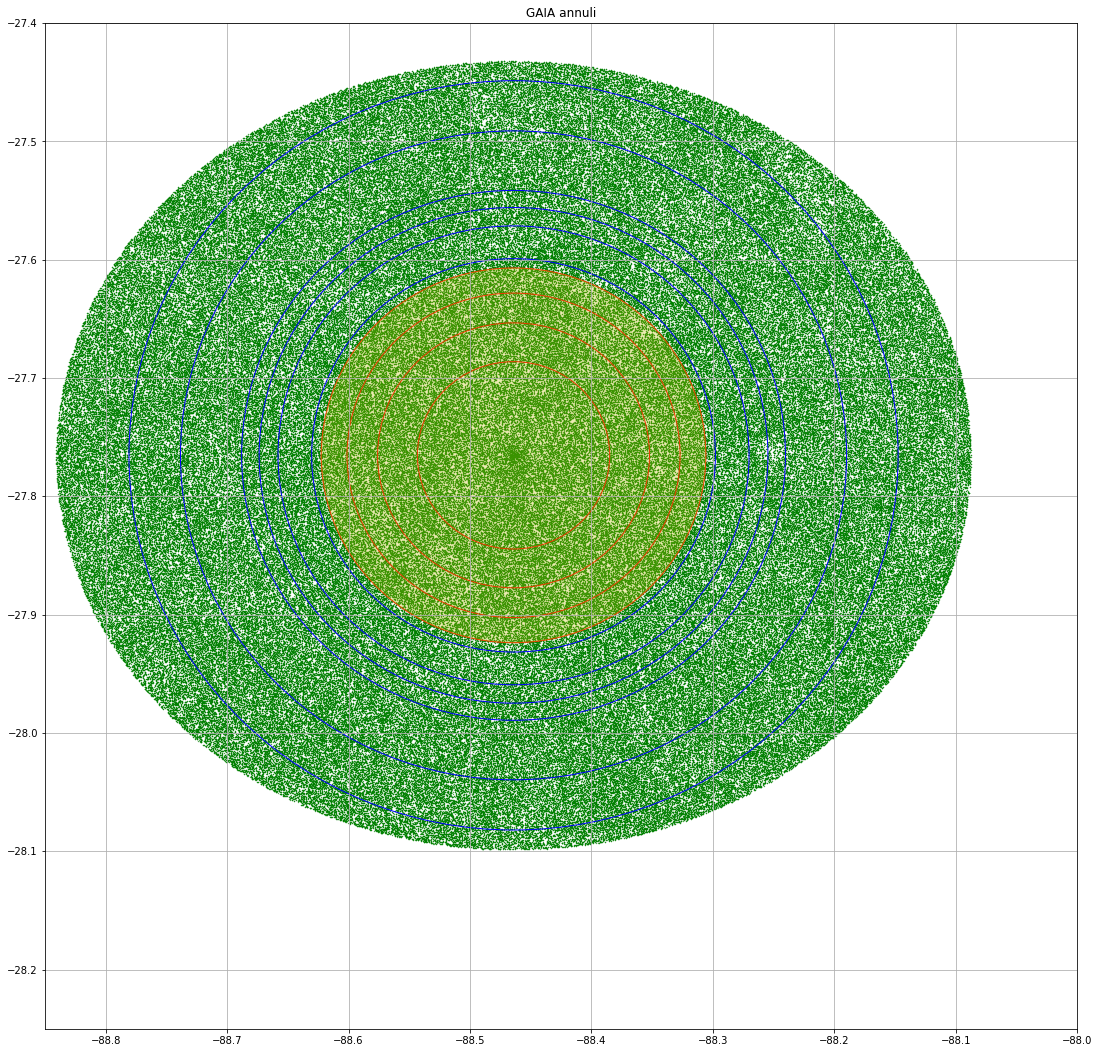

In [63]:
#plotting all of the Gaia data
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization.wcsaxes.frame import EllipticalFrame

coords = pd.DataFrame(columns=['RAJ2000','DEJ2000','Plx','pmRA','pmDE','Gmag'])
for table_name in v.keys():
  table = v[table_name]
  df = table.to_pandas()
  if 'Plx' in df.columns and 'Gmag' in df.columns:
    if 'RAJ2000' in df.columns:
      coords = pd.concat([coords,df[['RAJ2000','DEJ2000','Plx','pmRA','pmDE','Gmag']]])
    elif 'RA_ICRS' in df.columns:
      df = df.rename(columns={'RA_ICRS':'RAJ2000','DE_ICRS':'DEJ2000'})
      coords = pd.concat([coords,df[['RAJ2000','DEJ2000','Plx','pmRA','pmDE','Gmag']]])
    elif '_RA.icrs' in df.columns:
      df = df.rename(columns={'_RA.icrs':'RAJ2000','_DE.icrs':'DEJ2000'})
      coords = pd.concat([coords,df[['RAJ2000','DEJ2000','Plx','pmRA','pmDE','Gmag']]])


fig = plt.figure()
 #these are the dimensions for zooming
plt.grid(True)
fig.set_size_inches(18.5, 18.5, forward=True)

ax = fig.add_subplot(111)
ax.scatter(x=coords['RAJ2000']-360, y=coords['DEJ2000'], color='g', s=0.1) #the -360 is to wrap
plt.axis([-88.85, -88, -28.25, -27.4])
NGC6540_region = plt.Circle((-88.4641667, -27.7653), 0.07916666667, color='r', fill=False) #this is plotting the NGC 6540 region: the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region)
NGC6540_region = plt.Circle((-88.4641667, -27.7653), 0.1119585737, color='r', fill=False) #this is plotting the NGC 6540 region: the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region)
NGC6540_region = plt.Circle((-88.4641667, -27.7653), 0.1371206889, color='r', fill=False) #this is plotting the NGC 6540 region: the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region)
NGC6540_region = plt.Circle((-88.4641667, -27.7653), 0.1583333333, color='r', fill=False) #this is plotting the NGC 6540 region: the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region)
NGC6540_region = plt.Circle((-88.4641667, -27.7653), 0.1583333333, color='y', fill=True, alpha=0.3) #this is plotting the NGC 6540 region: the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region)
NGC6540_region = plt.Circle((-88.4641667, -27.7653), 0.16625, color='b', fill=False) #this is plotting the NGC 6540 region: the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region)
NGC6540_region = plt.Circle((-88.4641667, -27.7653), 0.193917938, color='b', fill=False) #this is plotting the NGC 6540 region: the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region)
NGC6540_region = plt.Circle((-88.4641667, -27.7653), 0.2094553121, color='b', fill=False) #this is plotting the NGC 6540 region: the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region)
NGC6540_region = plt.Circle((-88.4641667, -27.7653), 0.2239171474, color='b', fill=False) #this is plotting the NGC 6540 region: the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region)
NGC6540_region = plt.Circle((-88.4641667, -27.7653), 0.2742413779, color='b', fill=False) #this is plotting the NGC 6540 region: the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region)
NGC6540_region = plt.Circle((-88.4641667, -27.7653), 0.3166666667, color='b', fill=False) #this is plotting the NGC 6540 region: the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region)
plt.title('GAIA annuli')